# What this file does

I take the file I generated in Merges and Wrangling.ipynb and examine the relationship between building age and accessibility. This might explain the fact that Queens has superior accessibility, a trend discovered in Accessibility in NYC Schools.ipynb. (https://github.com/kpananjady/Accessibility-NYC-Schools/blob/master/Accessibility%20in%20NYC%20schools.ipynb)

# Findings

Queens has the most buildings built after 1992 of all the boroughs in the dataset of rated schools. I also see a correlation of sorts between building age and rating — the more recent the building, the less likely it is to score low on the accessibility scale. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
import matplotlib.pyplot as plt 

# How many rated buildings were built in or after 1992 by borough?

In [6]:
df_rated_schools = pd.read_csv('year_built_school.csv')

In [7]:
df_rated_schools

,Unnamed: 0,landmark,bbl,yearbuilt,yearalter1,yearalter2,histdist,xcoord,ycoord,Building Code,Lat,Lng,Rating,Primary_building_code,Borough_block_lot
0,0,NaN,1019330020,2011.0,0.0,0.0,NaN,998598.0,235315.0,M908,40.812380,-73.948014,10.0,M908,1.019330e+09
1,1,NaN,1017680021,1960.0,0.0,0.0,NaN,1001034.0,230970.0,M007,40.800773,-73.939335,9.0,M007,1.017680e+09
2,2,NaN,3017590013,1965.0,0.0,0.0,NaN,998848.0,192283.0,K023,40.694468,-73.947407,3.0,K023,3.017590e+09
3,3,NaN,3017590013,1965.0,0.0,0.0,NaN,998848.0,192283.0,K023,40.694468,-73.947407,3.0,K023,3.017590e+09
4,4,NaN,3047390001,1939.0,2014.0,0.0,NaN,1004897.0,175315.0,K244,40.647919,-73.925465,9.0,K244,3.047390e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,1175,NaN,1008897501,1977.0,0.0,0.0,NaN,989494.0,211251.0,M620,40.746441,-73.981211,3.0,M620,1.008898e+09
1176,1176,NaN,4012600001,1998.0,0.0,0.0,NaN,1013928.0,213493.0,Q230,40.752640,-73.892841,10.0,Q230,4.012600e+09
1177,1177,NaN,4096840008,1931.0,2011.0,0.0,NaN,1036320.0,195780.0,Q082,40.704077,-73.812200,9.0,Q082,4.096840e+09
1178,1178,NaN,3063990040,2012.0,0.0,0.0,NaN,982136.0,160277.0,K807,40.606728,-74.007703,10.0,K807,3.063990e+09


In [8]:
df_rated_schools.dtypes

Unnamed: 0                 int64
landmark                  object
bbl                        int64
yearbuilt                float64
yearalter1               float64
yearalter2               float64
histdist                  object
xcoord                   float64
ycoord                   float64
Building Code             object
Lat                      float64
Lng                      float64
Rating                   float64
Primary_building_code     object
Borough_block_lot        float64
dtype: object

In [9]:
#use regular expressions to get the borough out

In [11]:
df_rated_schools['Borough']= df_rated_schools['Borough_block_lot'].astype(str).str.extract(r'(^.)')

In [ ]:
#no of rated schools by borough

In [12]:
df_rated_schools['Borough'].value_counts()

3    315
4    285
2    269
1    247
5     64
Name: Borough, dtype: int64

In [13]:
#Queens leads by quite a way! This could explain why Queens leads the pack

In [14]:
df_rated_schools[df_rated_schools['yearbuilt']>=1992]['Borough'].value_counts()

4    88
3    51
2    44
1    32
5    14
Name: Borough, dtype: int64

# Age distribution of rated schools by borough

Queens

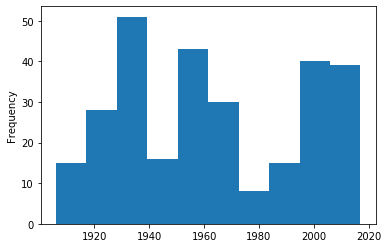

In [15]:
df_rated_schools[df_rated_schools['Borough']=='4']['yearbuilt'].plot(kind='hist')

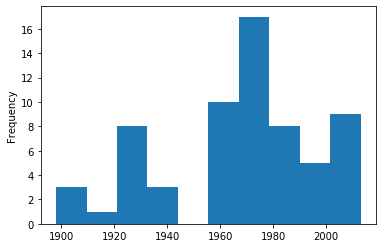

In [16]:
df_rated_schools[df_rated_schools['Borough']=='5']['yearbuilt'].plot(kind='hist')

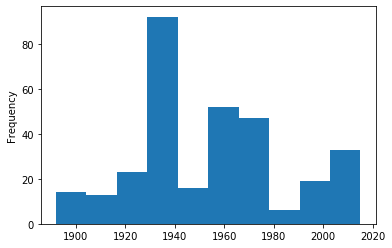

In [17]:
df_rated_schools[df_rated_schools['Borough']=='3']['yearbuilt'].plot(kind='hist')

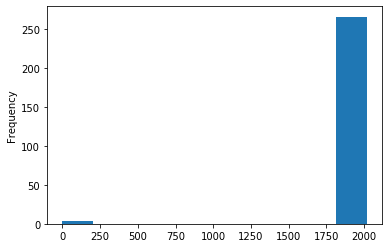

In [18]:
df_rated_schools[df_rated_schools['Borough']=='2']['yearbuilt'].plot(kind='hist')

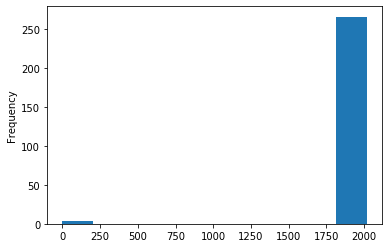

In [19]:
df_rated_schools[df_rated_schools['Borough']=='2']['yearbuilt'].plot(kind='hist')

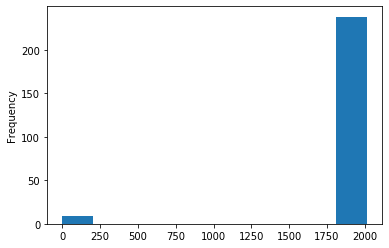

In [20]:
df_rated_schools[df_rated_schools['Borough']=='1']['yearbuilt'].plot(kind='hist')

# Correlation

In [21]:
#schools built after ADA don't score lower than 7

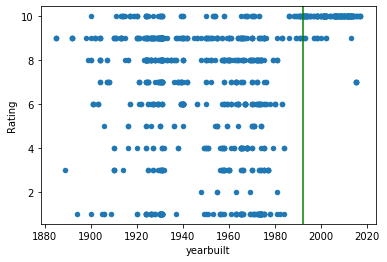

In [22]:
df_rated_schools[df_rated_schools['yearbuilt']>0].plot(x='yearbuilt', y='Rating', kind='scatter')
plt.axvline(x=1992, color='green')

In [ ]:
#